# Convolutional neural network

## Parameters

In [798]:
import torch

from back_propagation.back_propagation_iterative import inputs

sobel_filter = torch.tensor([
    [1.0, 0, -1.0],
    [2.0, 0, -2.0],
    [1.0, 0.0, -1.0]
])

bias = 0.0

## Random image (1, 1, 9, 9)

each value is within the range of 0-1

In [799]:
input_order = 9
image = torch.rand(1, 1, input_order, input_order)

print(image)

tensor([[[[0.9504, 0.6655, 0.1979, 0.3331, 0.4400, 0.7209, 0.9519, 0.4740,
           0.5025],
          [0.1289, 0.6480, 0.3326, 0.3473, 0.2863, 0.5032, 0.8522, 0.9659,
           0.1099],
          [0.0079, 0.7867, 0.3495, 0.1812, 0.5312, 0.7264, 0.7821, 0.2268,
           0.2902],
          [0.3311, 0.4139, 0.9388, 0.3224, 0.7391, 0.8877, 0.1853, 0.6254,
           0.1293],
          [0.0980, 0.9313, 0.7428, 0.9650, 0.2319, 0.1375, 0.5435, 0.3231,
           0.7077],
          [0.6582, 0.6527, 0.2098, 0.7066, 0.1767, 0.0302, 0.8774, 0.8500,
           0.9524],
          [0.3515, 0.8809, 0.5983, 0.7347, 0.8854, 0.5649, 0.5256, 0.3262,
           0.5942],
          [0.0150, 0.2774, 0.9029, 0.9827, 0.3367, 0.9283, 0.8134, 0.4648,
           0.3546],
          [0.3942, 0.4608, 0.3887, 0.4950, 0.3229, 0.8646, 0.0054, 0.1156,
           0.3497]]]])


## Convolution with the default parameters

The result has the dimension:
$$n_{new}={n-f}+1$$

- **n** - order of the input tensor
- **f** - order of the filter

In [800]:
import torch.nn as nn

cnn = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
cnn.state_dict()["weight"][0][0] = sobel_filter
cnn.state_dict()["bias"][0] = bias

z = cnn(image)
print(z)

tensor([[[[ 0.0035,  1.5392, -0.3313, -1.2448, -1.8944, -0.1788,  2.4258],
          [-1.4945,  1.6032, -0.1176, -1.8116, -0.5137,  0.7989,  1.7820],
          [-2.2018,  0.7548,  0.7284, -0.8482,  0.5451,  0.8385,  0.4397],
          [-1.4489, -0.0297,  1.2545,  1.7662, -0.7701, -0.9289, -0.3473],
          [ 0.0052,  0.0048,  0.2900,  2.3501, -1.3531, -1.5867, -0.3827],
          [-0.9331, -0.4667,  0.0251,  1.0705, -0.4577,  0.1209,  0.2467],
          [-2.0172, -1.2986,  0.9112, -0.0908, -0.2762,  1.9145,  0.5048]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2

stride=2 leads to:
- horizontal move - move 2 values right each time
- vertical mode - move 2 values down after finishing row

The result has the dimension:
$$n_{new}=\dfrac{n-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride

In [801]:
cnn_stride2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
cnn_stride2.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2.state_dict()["bias"][0] = 0.0

z_stride2 = cnn_stride2(image)
print(z_stride2)

tensor([[[[ 0.0035, -0.3313, -1.8944,  2.4258],
          [-2.2018,  0.7284,  0.5451,  0.4397],
          [ 0.0052,  0.2900, -1.3531, -0.3827],
          [-2.0172,  0.9112, -0.2762,  0.5048]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2 and padding=1

The result has the dimension:
$$n_{new}=\dfrac{n+2p-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride
- **p** - padding

In [802]:
cnn_stride2_padding1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
cnn_stride2_padding1.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding1.state_dict()["bias"][0] = 0.0

z_stride2_padding1 = cnn_stride2_padding1(image)
print(z_stride2_padding1)

tensor([[[[-1.9790,  0.9654, -0.9313,  0.0310,  1.9140],
          [-2.6353,  1.6032, -1.8116,  0.7989,  2.0449],
          [-2.9293, -0.0297,  1.7662, -0.9289,  2.1217],
          [-2.6920, -0.4667,  1.0705,  0.1209,  1.9673],
          [-1.1990, -0.7737, -0.6847,  1.9613,  0.6961]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2 and padding=same

To get the same input and output dimension:
$$n=\dfrac{n+2p-f}{s}+1$$

$$p = \frac{n(s - 1) + f - s}{2}$$

For **s=2** and **f=3**:
$$p = \frac{9(2 - 1) + 3 - 2}{2}=5$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride
- **p** - padding

In [803]:
f = 3
s = 2
padding_same_stride2 = input_order * (s - 1) + f - s

cnn_stride2_padding_same = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=f, stride=s, padding=padding_same_stride2)
cnn_stride2_padding_same.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding_same.state_dict()["bias"][0] = 0.0

z_stride2_padding_same = cnn_stride2_padding_same(image)
print(z_stride2_padding_same)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000, -0.9504,  0.7524, -0.2420,
           -0.5119,  0.4494,  0.5025,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000, -1.2161,  0.0035, -0.3313,
           -1.8944,  2.4258,  1.0125,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000, -0.7681, -2.2018,  0.7284,
            0.5451,  0.4397,  1.

## Padding visualization


In [804]:
import torch.nn.functional as F

padded_image = F.pad(image, (1, 1, 1, 1))  # (left, right, top, bottom)
print(padded_image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000],
          [0.0000, 0.9504, 0.6655, 0.1979, 0.3331, 0.4400, 0.7209, 0.9519,
           0.4740, 0.5025, 0.0000],
          [0.0000, 0.1289, 0.6480, 0.3326, 0.3473, 0.2863, 0.5032, 0.8522,
           0.9659, 0.1099, 0.0000],
          [0.0000, 0.0079, 0.7867, 0.3495, 0.1812, 0.5312, 0.7264, 0.7821,
           0.2268, 0.2902, 0.0000],
          [0.0000, 0.3311, 0.4139, 0.9388, 0.3224, 0.7391, 0.8877, 0.1853,
           0.6254, 0.1293, 0.0000],
          [0.0000, 0.0980, 0.9313, 0.7428, 0.9650, 0.2319, 0.1375, 0.5435,
           0.3231, 0.7077, 0.0000],
          [0.0000, 0.6582, 0.6527, 0.2098, 0.7066, 0.1767, 0.0302, 0.8774,
           0.8500, 0.9524, 0.0000],
          [0.0000, 0.3515, 0.8809, 0.5983, 0.7347, 0.8854, 0.5649, 0.5256,
           0.3262, 0.5942, 0.0000],
          [0.0000, 0.0150, 0.2774, 0.9029, 0.9827, 0.3367, 0.9283, 0.8134,
           0.4648, 0.3546, 0.0000],
 

## Visualization

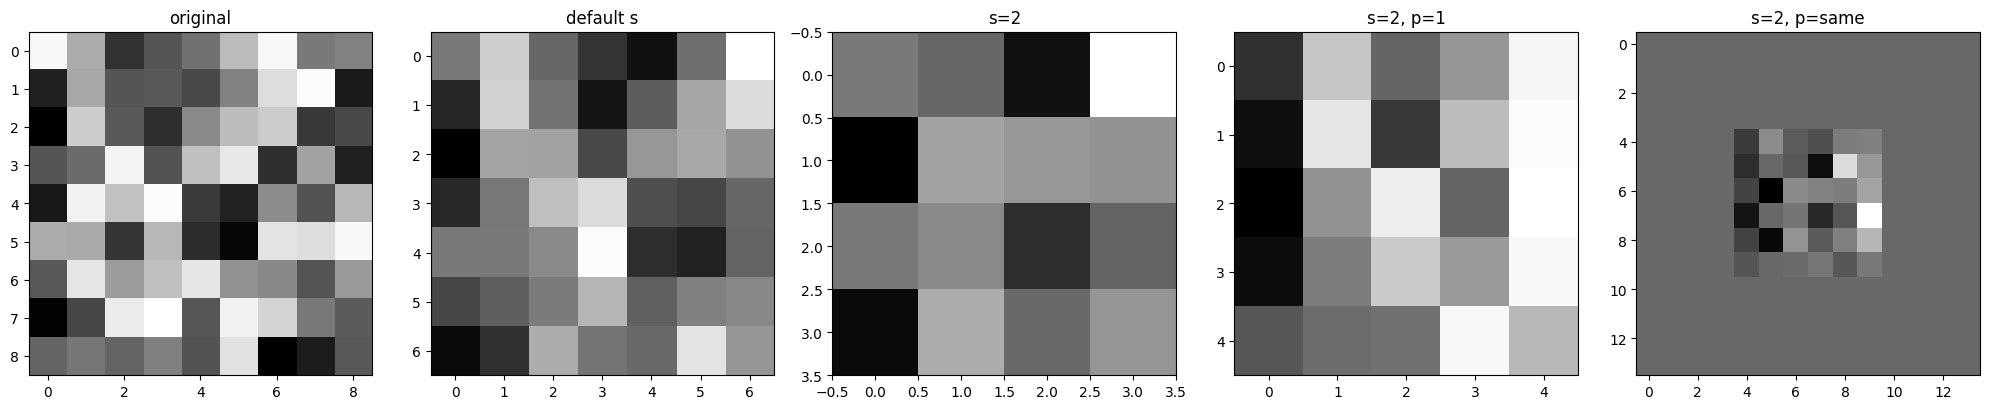

In [805]:
from matplotlib import pyplot as plt

images = [image, z, z_stride2, z_stride2_padding1, z_stride2_padding_same]
labels = ["original", "default s", "s=2", "s=2, p=1", "s=2, p=same"]

n = len(images)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))

na_stride2 = z.squeeze().detach().numpy()
plt.imshow(na_stride2, cmap="gray")

for ax, i, l in zip(axes, images, labels):
    img_np = i.squeeze().detach().numpy()
    ax.imshow(img_np, cmap="gray")
    ax.set_title(l)

plt.tight_layout()
plt.show()